In [1]:
from google.colab import drive
drive.mount("/F")

Mounted at /F


In [3]:
import pandas as pd

In [4]:
base = pd.read_csv('/F/My Drive/Maratona/Regressão Linear/house_prices.csv')

In [5]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
base.shape

(21613, 21)

In [7]:
X = base.iloc[:,5:6].values

In [8]:
X.shape

(21613, 1)

In [9]:
Y = base.iloc[:,2:3].values

In [10]:
Y.shape

(21613, 1)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [13]:
area = scaler_x.fit_transform(X)
price = scaler_y.fit_transform(Y)

In [14]:
area

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

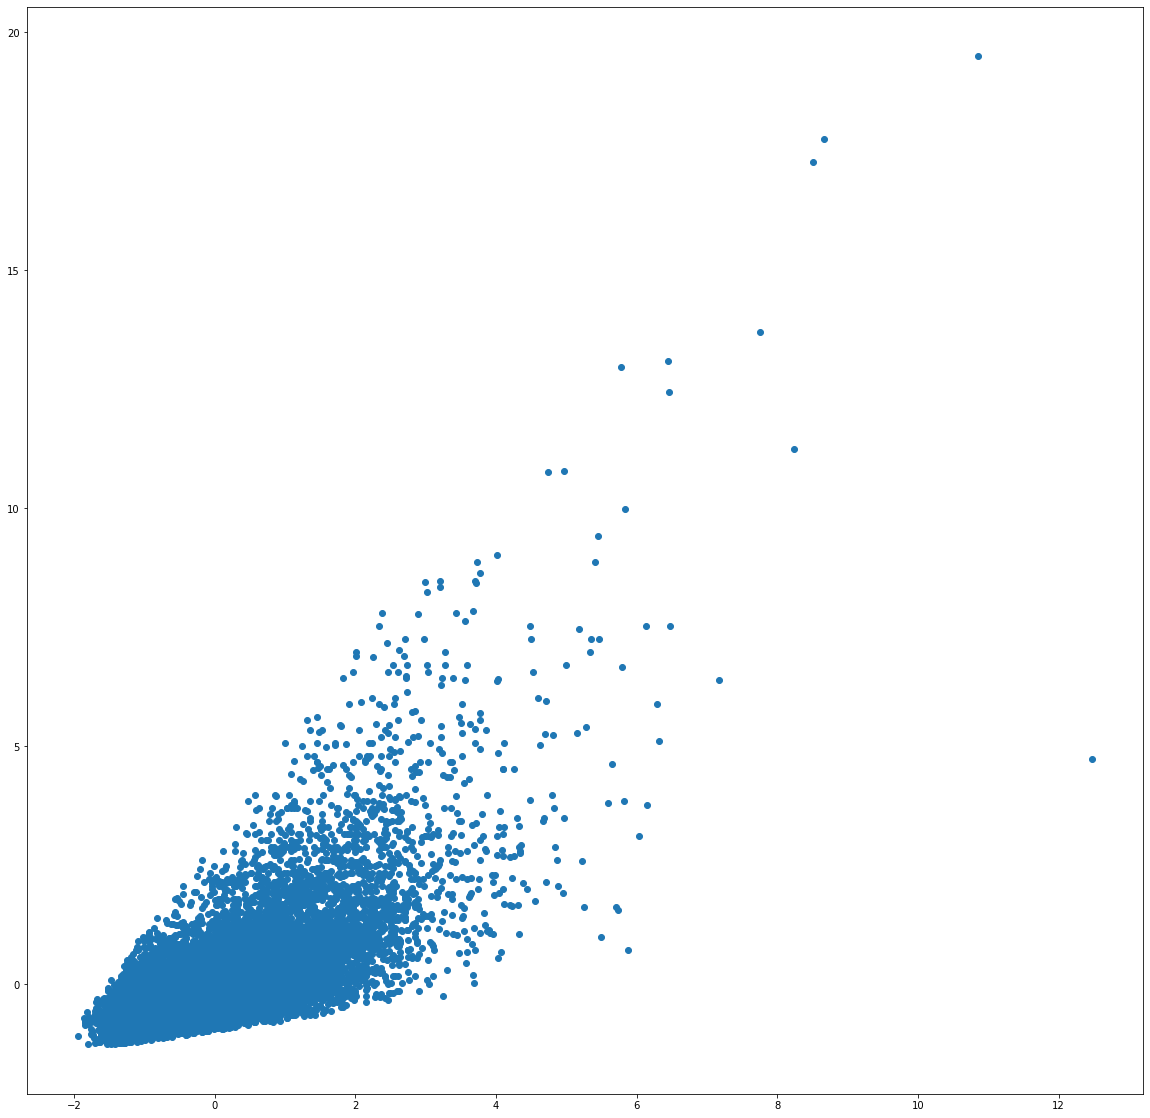

In [16]:
plt.figure(figsize=(20,20))
plt.scatter(area, price)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression()

In [19]:
regression.fit(area, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print(regression.coef_, regression.intercept_)

[[0.70203505]] [-2.0668887e-16]


In [21]:
import tensorflow as tf

In [22]:
model = tf.keras.Sequential()

In [23]:
model.add(tf.keras.layers.Dense(1, input_shape=(area.shape[1],)))

In [24]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(0.001))

In [25]:
hist = model.fit(area, price, epochs=1000, verbose=0)

In [26]:
y_pred = model.predict(area)

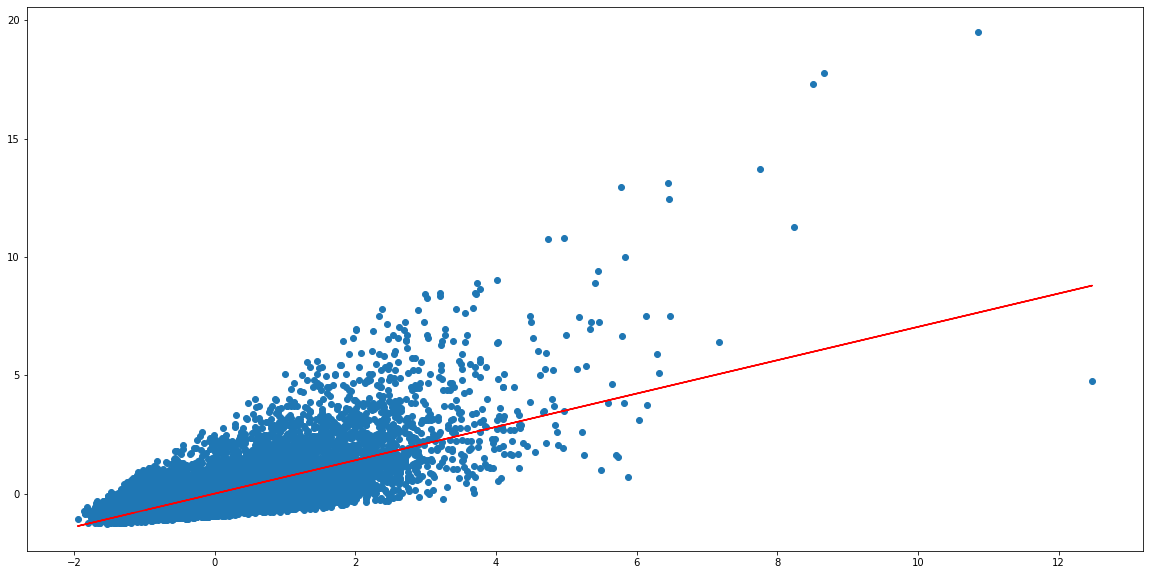

In [27]:
plt.figure(figsize=(20,10))
plt.scatter(area, price)
plt.plot(area, y_pred, 'r')
plt.show()

In [28]:
print(model.get_weights())

[array([[0.7042798]], dtype=float32), array([0.00065697], dtype=float32)]


In [29]:
previ = regression.coef_*area + regression.intercept_

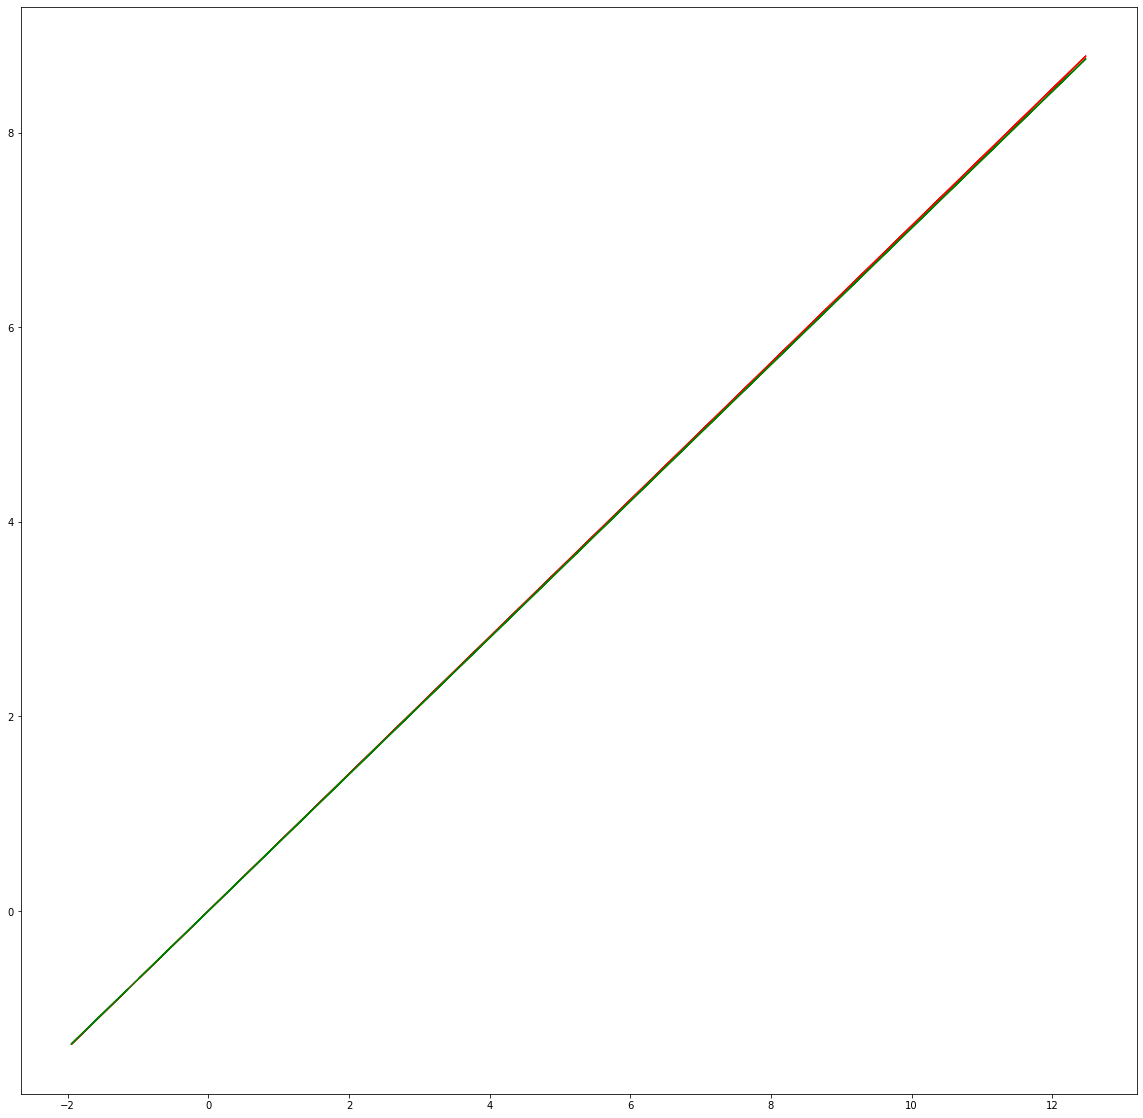

In [30]:
plt.figure(figsize=(20,20))
plt.plot(area, y_pred, 'r')
plt.plot(area, previ, 'g')
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(Y,scaler_y.inverse_transform(y_pred))
mae2 = mean_absolute_error(Y,scaler_y.inverse_transform(previ))
print(mae1, mae2)

173848.02564428817 173688.2733595311
